In [105]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [144]:
import pymc as pm
from pymc.Matplot import plot as mcplot

from __future__ import division

In [98]:
p_true = 0.05
N = 5000

occurrences = pm.rbernoulli(p_true, N)

#print occurrences
print occurrences.sum()
print occurrences.sum() / N

237
0.0474


In [99]:
# prior
p = pm.Uniform('p', lower=0, upper=1)
#p = pm.Beta('p', 5, 5)

# our observations are drawn from a Bernoulli distribution, 
# with a parameter theta that we don't know, and want to estimate
obs = pm.Bernoulli('obs', p, value=occurrences, observed=True)

mcmc = pm.MCMC([p, obs])
mcmc.sample(18000, 1000)

 [-----------------100%-----------------] 18000 of 18000 complete in 2.0 sec

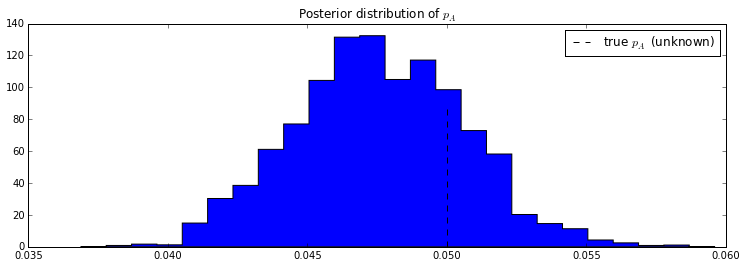

In [100]:
figsize(12.5, 4)
plt.title("Posterior distribution of $p_A$")
plt.vlines(p_true, 0, 90, linestyle='--', label='true $p_A$ (unknown)')
plt.hist(mcmc.trace('p')[:], bins=25, histtype="stepfilled", normed=True)
plt.legend()

In [34]:
p

<pymc.distributions.Uniform 'p' at 0x10b069f90>

# Try two means example 

From http://stats.stackexchange.com/questions/46626/fitting-model-for-two-normal-distributions-in-pymc

In [130]:
size = 10

In [131]:
p = pm.Uniform("p", 0, 1)  # fraction that comes from mean1 vs mean2

In [132]:
ber = pm.Bernoulli("ber", p=p, size=size) # produces 1 with proportion p
# that is, each instance is a flip of a coin w/ theta = p

In [133]:
mean1 = pm.Normal("mean1", 0, 0.001) # use Normal instead of Uniform because Normal can take on any value, and we don't know for sure that it can't be any value
mean2 = pm.Normal("mean2", 0, 0.001)

precision = pm.Gamma("precision", alpha=0.1, beta=0.1)

In [134]:
@pm.deterministic
def mean(ber=ber, mean1=mean1, mean2=mean2):
    return ber*mean1 + (1-ber)*mean2

In [135]:
# generate artificial data
# based on a boolean v, we either generate something around 10 or -10
v = np.random.randint(0, 2, size)
data = v*(10 + np.random.randn(size)) + (1-v)*(-10 + np.random.randn(size))

In [136]:
obs = pm.Normal("obs", mean, precision, value=data, observed=True)

In [137]:
model = pm.Model([p, precision, mean1, mean2, obs])

In [139]:
mcmc = pm.MCMC(model)
mcmc.sample(50000,1000)

 [-----------------100%-----------------] 50000 of 50000 complete in 13.1 sec

In [143]:
mcmc.trace('mean1').gettrace()[-1:]

array([ 9.8537499])

Plotting mean1


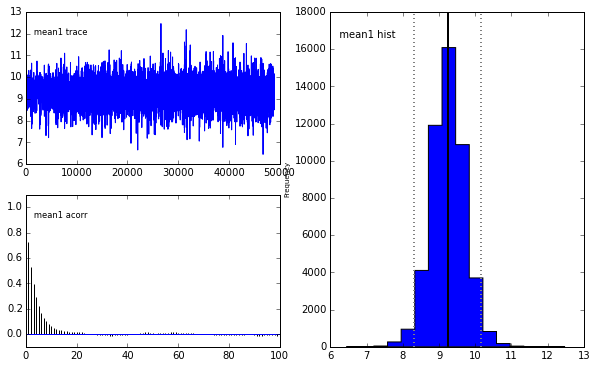

In [145]:
mcplot(mcmc.trace("mean1", 2), common_scale=False)

Plotting mean2


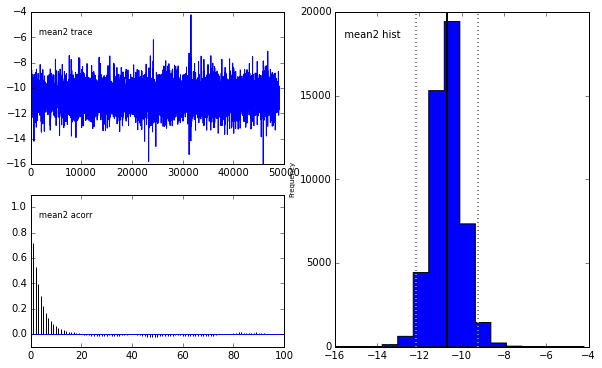

In [146]:
mcplot(mcmc.trace("mean2", 2), common_scale=False)

Plotting p


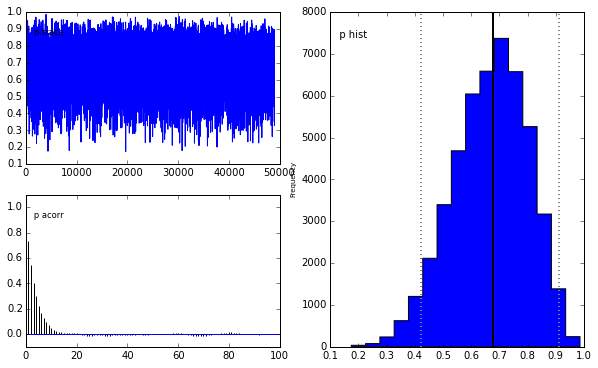

In [147]:
mcplot(mcmc.trace("p", 2), common_scale=False)

Plotting precision


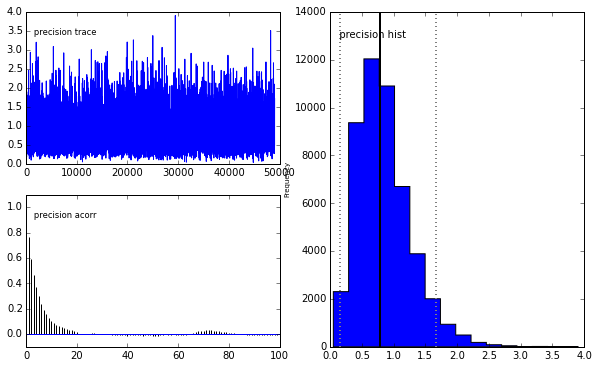

In [149]:
mcplot(mcmc.trace('precision', 2), common_scale=False)

# Try three means, using Categorical 

From http://stackoverflow.com/questions/18987697/how-to-model-a-mixture-of-3-normals-in-pymc